# 🔹 LangGraph RAG Agent

This notebook walks you through the key building blocks leading up to a **LangGraph RAG Agent** implementation.

### 📚 Topics Covered:

1. **LangChain LLM Basics**  
2. **LLM Invocation**  
3. **LLM with Tools**  
4. **Structured Output from LLM**  
5. **Basic LangGraph Chatbot**  
6. **Adding Memory to the Chatbot**  
7. **LangGraph Agent with Tools**  
8. **LangGraph RAG Agent**  


## Part 1: LLM Basics

### INSTALLATION OF PACKAGES

In [ ]:
#!pip install -qU langchain langchain-openai langchain-community langchain-core
# !pip install -qU duckduckgo-search wikipedia
# !pip install -qU pydantic

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
#openai.api_key  = os.environ['OPENAI_API_KEY']
#Eddy_key_openai  = os.environ['OPENAI_API_KEY']
#from openai import OpenAI
#client = OpenAI(api_key=Eddy_key_openai)
OPENAI_API_KEY=os.environ['OPENAI_API_KEY']


### Enable LangSmith Tracing

In [2]:
LANGSMITH_API_KEY=os.environ['LANGSMITH_API_KEY']
LANGSMITH_TRACING=os.environ["LANGSMITH_TRACING"]
LANGSMITH_ENDPOINT=os.environ["LANGSMITH_ENDPOINT"]
LANGSMITH_PROJECT=os.environ["LANGSMITH_PROJECT"]
LANGSMITH_WORKSPACE_ID=os.environ["LANGSMITH_WORKSPACE_ID"]

### SECTION 1: BASIC LLM INVOCATION

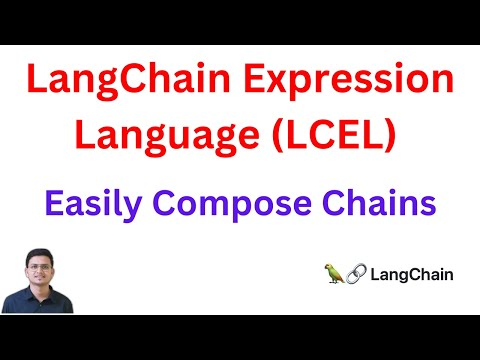

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('NQWfvhw7OcI')

In [4]:
from langchain_openai import ChatOpenAI

In [6]:
# Initialize the LLM
llm = ChatOpenAI(model="gpt-5-nano", temperature=0.7)

# Simple invocation
response = llm.invoke("O que é a inteligência artificial?")
print(response.content)

Resumo: IA é a capacidade de sistemas computacionais realizarem tarefas que normalmente exigiriam inteligência humana, como entender linguagem, reconhecer padrões, aprender com dados, planejar e tomar decisões.

Pontos-chave:
- Tipos
  - IA estreita (ou fraca): de propósito específico, como assistentes virtuais, reconhecimento de imagem ou filtros de spam.
  - IA geral (ou forte): conceito teórico de uma máquina com inteligência geral comparável à humana (não existe plenamente hoje).
- Principais áreas técnicas
  - Aprendizado de máquina (machine learning): modelos aprendem a partir de dados.
  - Aprendizado profundo (deep learning): redes neurais profundas usadas em tarefas complexas.
  - IA simbólica/heurísticas: uso de regras explícitas e lógica.
- Como funciona, em linhas gerais
  - Coleta de dados → treino de modelos → avaliação → implementação → melhoria contínua.
- Exemplos de aplicação
  - Reconhecimento de fala e tradução, reconhecimento de imagens (diagnóstico médico, vigilân

In [7]:
response

AIMessage(content='Resumo: IA é a capacidade de sistemas computacionais realizarem tarefas que normalmente exigiriam inteligência humana, como entender linguagem, reconhecer padrões, aprender com dados, planejar e tomar decisões.\n\nPontos-chave:\n- Tipos\n  - IA estreita (ou fraca): de propósito específico, como assistentes virtuais, reconhecimento de imagem ou filtros de spam.\n  - IA geral (ou forte): conceito teórico de uma máquina com inteligência geral comparável à humana (não existe plenamente hoje).\n- Principais áreas técnicas\n  - Aprendizado de máquina (machine learning): modelos aprendem a partir de dados.\n  - Aprendizado profundo (deep learning): redes neurais profundas usadas em tarefas complexas.\n  - IA simbólica/heurísticas: uso de regras explícitas e lógica.\n- Como funciona, em linhas gerais\n  - Coleta de dados → treino de modelos → avaliação → implementação → melhoria contínua.\n- Exemplos de aplicação\n  - Reconhecimento de fala e tradução, reconhecimento de imag

In [8]:
from langchain_core.messages import HumanMessage, SystemMessage
# Using messages for more control
messages = [
    SystemMessage(content="Você é um assistente de IA que explica tópicos complexos de forma simples."),
    HumanMessage(content="Explique o que é a inteligência artificial em 2 sentenças.")
]

response = llm.invoke(messages)
response

AIMessage(content='Inteligência artificial é o conjunto de técnicas que permite às máquinas realizar tarefas que costumam exigir inteligência humana, como reconhecer padrões, entender linguagem e tomar decisões. Ela funciona por meio de algoritmos que aprendem com dados e melhoram seu desempenho com o tempo, adaptando-se a novas situações.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 645, 'prompt_tokens': 42, 'total_tokens': 687, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-ChjOLzTU5flDnO24VA2Q4VYvHbp2G', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--e6437035-a9f7-4007-9949-3e54b570aa5f-0', usage_metadata={'input_tokens': 42, 'outp

In [9]:
print(response.content)

Inteligência artificial é o conjunto de técnicas que permite às máquinas realizar tarefas que costumam exigir inteligência humana, como reconhecer padrões, entender linguagem e tomar decisões. Ela funciona por meio de algoritmos que aprendem com dados e melhoram seu desempenho com o tempo, adaptando-se a novas situações.


### LLM WITH TOOLS

In [ ]:
#!pip install -qU duckduckgo-search

In [10]:
from langchain_core.tools import tool
from langchain_community.tools import DuckDuckGoSearchRun
# https://python.langchain.com/docs/integrations/tools/ddg/

In [12]:
@tool
def calculator(expression: str) -> str:
    """Calculate mathematical expressions. Use this for any math calculations."""
    try:
        result = eval(expression)
        return f"O resultado de {expression} é {result}"
    except Exception as e:
        return f"Erro ao calcular {expression}: {str(e)}"

search_tool = DuckDuckGoSearchRun()

# Bind tools to the LLM
tools = [calculator, search_tool]
llm_with_tools = llm.bind_tools(tools)

# Test the calculator tool
print("Testando a ferramenta de calculadora:")
response = llm_with_tools.invoke("Qual é o resultado de 25 * 4 + 17?")
print(f"Resposta: {response.content}")

Testando a ferramenta de calculadora:
Resposta: 117

Explicação rápida: 25 × 4 = 100, e 100 + 17 = 117.


In [ ]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5hF7RvedMKMTET0x8wxIFCBG', 'function': {'arguments': '{"expression":"25 * 4 + 17"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 107, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-BizTtJr7IPMg5kp1QWvHkiK0qjfY1', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f94bab0a-4be5-4464-9e1b-38e891f1bdd9-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '25 * 4 + 17'}, 'id': 'call_5hF7RvedMKMTET0x8wxIFCBG', 'type': 'tool_call'}], usage_metadata={'input_tokens': 107, 'output_tokens': 20, 'total_tokens': 127, 'inp

In [13]:
# Map tool names to tool objects for dynamic execution
tool_map = {
    'calculator': calculator,
    'duckduckgo_search': search_tool,
}

def handle_tool_calls(response, tool_map):
    """Executes all tool calls in the LLM response using the tool_map."""
    if not getattr(response, 'tool_calls', None):
        return

    print(f"Tool calls requested: {len(response.tool_calls)}")
    for tool_call in response.tool_calls:
        tool_name = tool_call['name']
        args = tool_call['args']
        print(f"Tool: {tool_name}")
        print(f"Args: {args}")

        tool = tool_map.get(tool_name)
        if tool:
            result = tool.invoke(args)
            # Print first 200 chars for long responses (e.g., search)
            preview = result[:200] + "..." if isinstance(result, str) and len(result) > 200 else result
            print(f"Tool result: {preview}")

In [14]:
def test_llm_tool(query):
    print(f"Query: {query}")
    response = llm_with_tools.invoke(query)
    print(f"Response: {getattr(response, 'content', response)}")
    handle_tool_calls(response, tool_map)
    print("\n")

test_llm_tool("Qual é o resultado de 25 * 4 + 17?")
test_llm_tool("Pesquise por notícias recentes sobre inteligência artificial")

Query: Qual é o resultado de 25 * 4 + 17?
Response: 117

Cálculo: 25 * 4 = 100; 100 + 17 = 117.


Query: Pesquise por notícias recentes sobre inteligência artificial
Response: 
Tool calls requested: 1
Tool: duckduckgo_search
Args: {'query': 'notícias recentes sobre inteligência artificial'}
Tool result: Brasileiros já podem usar IA do Google para fazer buscas; saiba o que muda Inteligência Artificial Há um ano • 1 min de leitura 5 days ago · Acompanhe em VEJA as últimas e principais notícias sobre In...




In [15]:
search_tool.invoke("Pesquise por notícias recentes sobre inteligência artificial")

'4 days ago · Que bolha? Mercado nega temores sobre IA e mantém otimismo; entenda 28/11/2025 | 03:00 Negócios 5 days ago · Acompanhe em VEJA as últimas e principais notícias sobre Inteligencia Artificial . Entrevistas, análises e opinião e muito mais. 6 days ago · Acompanhe no Neofeed as notícias de hoje do Brasil e do mundo sobre Inteligência artificial , com reportagens e entrevistas exclusivas. Acesse! Acompanhe as últimas notícias sobre Inteligência Artificial . Reportagens, entrevistas, notícias e mais. Acompanhe no Gazeta de São Paulo. Mantenha-se informado sobre avanços, debates éticos e o esforço global por regulamentação à medida que a IA continua a evoluir.'

### STRUCTURED OUTPUT FROM LLM

In [16]:
from pydantic import BaseModel, Field
from typing import List, Optional

In [17]:
class PersonInfo(BaseModel):
    """Information about a person"""
    name: str = Field(description="Nome completo da pessoa")
    age: Optional[int] = Field(description="Idade da pessoa")
    occupation: str = Field(description="Profissão ou ocupação da pessoa")
    skills: List[str] = Field(description="Lista de habilidades ou especializações")

structured_llm = llm.with_structured_output(PersonInfo)

# Test with person information
print("Testando a saída estruturada - Informações da Pessoa:")
person_prompt = """
Extraia informações sobre esta pessoa:
"John Smith é um engenheiro de software de 35 anos que trabalha na Google.
Ele se especializa em aprendizado de máquina, programação Python e arquitetura de nuvem.
John tem mais de 10 anos de experiência na tecnologia e é apaixonado por pesquisa em IA."
"""

person_result = structured_llm.invoke(person_prompt)
print(f"Name: {person_result.name}")
print(f"Age: {person_result.age}")
print(f"Occupation: {person_result.occupation}")
print(f"Skills: {', '.join(person_result.skills)}")

Testando a saída estruturada - Informações da Pessoa:
Name: John Smith
Age: 35
Occupation: engenheiro de software
Skills: aprendizado de máquina, programação Python, arquitetura de nuvem, pesquisa em IA


## Part 2: Basic LangGraph Chatbot

In [ ]:
#!pip install -qU langgraph

### LangGraph STATE

In [18]:
from typing import Annotated, TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph.message import add_messages

In [19]:
class State(TypedDict):
    """State for our chatbot - this holds the conversation history"""
    # The add_messages function handles appending new messages to the conversation
    messages: Annotated[list[BaseMessage], add_messages]

# Initialize the LLM
llm = ChatOpenAI(model="gpt-5-nano", temperature=0.2)

### CREATING THE CHATBOT NODE

In [21]:
def chatbot_node(state: State) -> State:
    """
    The main chatbot node that processes messages and generates responses
    """
    print(f"Processing {len(state['messages'])} messages")

    # Get the response from the LLM
    response = llm.invoke(state["messages"])

    # Return the updated state with the new response
    return {"messages": [response]}

print("Nó de função de chatbot criado")

Nó de função de chatbot criado


### BUILDING THE GRAPH

In [22]:
from langgraph.graph import StateGraph, START, END

In [23]:
graph_builder = StateGraph(State)

# Add the chatbot node to the graph
graph_builder.add_node("chatbot", chatbot_node)

# Define the flow: START -> chatbot -> END
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# Compile the graph
graph = graph_builder.compile()

print("Graph structure created")
print("Graph compiled successfully")

Graph structure created
Graph compiled successfully


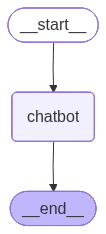

In [24]:
# ============================================================================
# VISUALIZE THE GRAPH
# ============================================================================
from IPython.display import Image, display

img = graph.get_graph(xray=True).draw_mermaid_png()
with open("graph.png", "wb") as f:
    f.write(img)

display(Image("graph.png"))

### TESTING THE CHATBOT

In [25]:
def test_chatbot(message: str):
    """Helper function to test our chatbot"""
    print(f"\n🤖 User: {message}")

    # Create the initial state with the user message
    initial_state = {"messages": [HumanMessage(content=message)]}

    # Run the graph
    result = graph.invoke(initial_state)

    # Get the AI response
    ai_response = result["messages"][-1].content
    print(f"🤖 Assistant: {ai_response}")

    return result

# Test with simple messages
test_cases = [
    "Olá! Meu nome é Eddy Giusepe?",
    "Você lembra do meu nome?"
]

for test_message in test_cases:
    test_chatbot(test_message)


🤖 User: Olá! Meu nome é Eddy Giusepe?
Processing 1 messages
🤖 Assistant: Olá, Eddy Giusepe! Prazer em conhecê-lo. Se esse é o seu nome, vou usá-lo nas nossas conversas. Como posso ajudar hoje? Quer que eu te ajude com algo específico (dúvidas, estudo, programação, curiosidades, etc.)?

🤖 User: Você lembra do meu nome?
Processing 1 messages
🤖 Assistant: Não sei o seu nome neste momento. Não tenho como saber sem você me dizer. Se quiser, diga como prefere que eu o chame aqui neste chat e eu usarei esse nome enquanto esta conversa durar. Não mantenho esse dado após encerrar a sessão.


### ADDING MEMORY TO THE CHATBOT

In [26]:
from langgraph.checkpoint.memory import MemorySaver

In [27]:
memory = MemorySaver()

# Compile the graph with memory
graph_with_memory = graph_builder.compile(checkpointer=memory)

print("Memória adicionada ao chatbot")

def chat_with_memory(message: str, thread_id: str):
    """Chat function with memory"""
    print(f"\n👤 User: {message}")

    # Configuration for the thread
    config = {"configurable": {"thread_id": thread_id}}

    # Add the user message to the conversation
    initial_state = {"messages": [HumanMessage(content=message)]}

    # Run the graph with memory
    result = graph_with_memory.invoke(initial_state, config)

    # Get the AI response
    ai_response = result["messages"][-1].content
    print(f"🤖 Assistant: {ai_response}")


# Test conversation with memory
print("\nTestando a conversa com memória:")

# Iniciar uma conversa
chat_with_memory("Olá, meu nome é Eddy Giusepe", thread_id="thread-1")
chat_with_memory("Qual é o meu nome?", thread_id="thread-1")

Memória adicionada ao chatbot

Testando a conversa com memória:

👤 User: Olá, meu nome é Eddy Giusepe
Processing 1 messages
🤖 Assistant: Olá, Eddy! Prazer em conhecê-lo. Como posso ajudar hoje? Quer que eu te chame de Eddy?

Diga em que você precisa: esclarecer dúvidas, revisar textos, aprender algo novo, programar, planejar um projeto, ou apenas conversar. Estou aqui para ajudar.

👤 User: Qual é o meu nome?
Processing 3 messages
🤖 Assistant: Você é Eddy Giusepe. Quer que eu te chame apenas de Eddy ou prefere outro formato?


## Part 3: Langgraph Agent with Tools

In [28]:
class AgentState(TypedDict):
    """State for our two-node agent"""
    messages: Annotated[list[BaseMessage], add_messages]

# Initialize LLM with tools
llm = ChatOpenAI(model="gpt-5-nano", temperature=0.2)
llm_with_tools = llm.bind_tools(tools)

### CREATING CHATBOT NODE

In [29]:
def chatbot_node(state: AgentState) -> AgentState:
    """
    The chatbot node that decides whether to use tools or provide direct responses
    """
    messages = state["messages"]

    # Add system prompt
    system_message = """Você é um assistente de IA útil. Você tem acesso a ferramentas de pesquisa na web e de calculadora.

    Use a ferramenta de pesquisa na web quando:
    - For perguntado sobre eventos atuais, notícias ou informações recentes
    - Precisa encontrar fatos específicos ou dados
    - Perguntado sobre informações em tempo real (tempo, preços de ações, etc.)

    Use a ferramenta de calculadora quando:
    - Precisa realizar cálculos matemáticos
    - Precisa resolver problemas matemáticos

    Para perguntas de conhecimento geral que não requerem dados em tempo real, responda diretamente.
    Seja útil e conversacional em suas respostas."""

    # Prepare messages with system prompt
    all_messages = [{"role": "system", "content": system_message}] + messages

    # Get response from LLM
    response = llm_with_tools.invoke(all_messages)

    return {"messages": [response]}

print("Nó de chatbot criado")

Nó de chatbot criado


### CREATING TOOL NODE AND ROUTING LOGIC

In [30]:
from langgraph.prebuilt import ToolNode
from typing import Literal

In [31]:
tools

[StructuredTool(name='calculator', description='Calculate mathematical expressions. Use this for any math calculations.', args_schema=<class 'langchain_core.utils.pydantic.calculator'>, func=<function calculator at 0x7c04e42d4720>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [32]:
tool_node = ToolNode(tools)

print("Nó de ferramenta criado")


def should_continue(state: AgentState) -> Literal["tools", "end"]:
    """
    Determine whether to continue to tools or end the conversation
    """
    messages = state["messages"]
    last_message = messages[-1]

    # If the last message has tool calls, go to tools
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"
    # Otherwise, end the conversation
    else:
        return "end"

print("Lógica de roteamento criada")

Nó de ferramenta criado
Lógica de roteamento criada


### BUILDING GRAPH

In [33]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

Graph compiled with memory



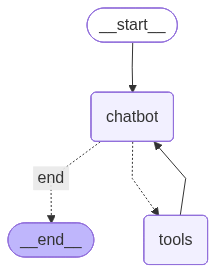

In [34]:
from IPython.display import Image, display

workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("chatbot", chatbot_node)
workflow.add_node("tools", tool_node)

# Set entry point
workflow.add_edge(START, "chatbot")

# Add conditional edges
workflow.add_conditional_edges(
    "chatbot",
    should_continue,
    {
        "tools": "tools",
        "end": END,
    },
)

# After using tools, go back to chatbot
workflow.add_edge("tools", "chatbot")

# Compile the graph
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

print("Graph compiled with memory\n")

# ============================================================================
# VISUALIZE THE GRAPH
# ============================================================================
img = app.get_graph(xray=True).draw_mermaid_png()
with open("graph.png", "wb") as f:
    f.write(img)


display(Image("graph.png"))

### TESTING AGENT

In [35]:
from langchain_core.messages import HumanMessage, ToolMessage

def chat_with_agent(message: str, thread_id: str):
    """Chat with the two-node agent"""
    print(f"\n👤 User: {message}")

    config = {"configurable": {"thread_id": thread_id}}

    # Stream the response to see the process
    messages_to_process = {"messages": [HumanMessage(content=message)]}

    for event in app.stream(messages_to_process, config):
        for value in event.values():
            if "messages" in value:
                last_message = value["messages"][-1]
                if hasattr(last_message, 'content') and last_message.content:
                    if isinstance(last_message, AIMessage):
                        print(f"🤖 Assistant: {last_message.content}")
                    elif isinstance(last_message, ToolMessage):
                        print(f"🔧 Tool Result: {last_message.content[:100]}...")

while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break
    chat_with_agent(user_input, thread_id="thread-2")

# Questions
# I am Pradip
# Do you remember my name
# What's 15% of 240?
# What's the latest news about artificial intelligence?
# Follow-up: Can you tell me more about that?


👤 User: OLá, me chamo Eddy
🤖 Assistant: Oi, Eddy! Prazer em conhecê-lo. Como posso ajudar hoje? Posso:

- pesquisar notícias ou informações atuais
- fazer cálculos ou resolver problemas de matemática
- explicar conceitos ou revisar textos
- ajudar com estudos, programação, idiomas, etc.

O que você prefere fazer agora?

👤 User: Quanto é 5 -6?
🔧 Tool Result: O resultado de 5 - 6 é -1...
🤖 Assistant: O resultado é -1. 5 menos 6 é igual a -1. Se quiser, posso explicar rapidamente.

👤 User: Até!
🤖 Assistant: Até, Eddy! Foi um prazer falar com você. Se precisar de mais ajuda no futuro, é só chamar. Tenha um ótimo dia!


KeyboardInterrupt: Interrupted by user

## Part 4: Advanced Langgraph Agent

In [ ]:
from IPython.display import Image, display

display(Image('/content/rag agent flow minimal.png', width=500))

In [ ]:
#!pip install -qU langgraph langchain langchain-openai langchain-core langchain-community langchain-chroma chromadb
# !pip install -qU duckduckgo-search faiss-cpu
# !pip install -qU langsmith sentence-transformers

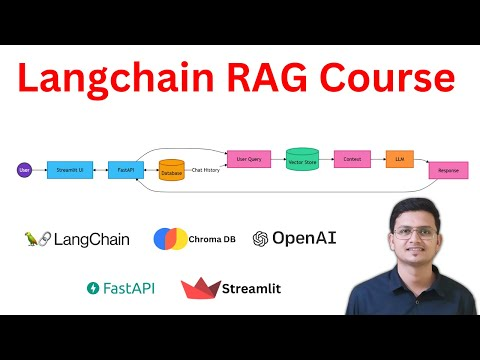

In [37]:
from IPython.display import YouTubeVideo

YouTubeVideo('38aMTXY2usU')

In [38]:
from pathlib import Path
from typing   import List
from langchain_community.document_loaders import (
    PyPDFLoader, Docx2txtLoader
)
from langchain_text_splitters          import RecursiveCharacterTextSplitter
from langchain_openai                  import OpenAIEmbeddings
from langchain_community.vectorstores  import Chroma
from langchain_core.documents          import Document
"""
Build & persist a Chroma vector index from PDF / DOCX / MD / TXT files.
Run this once; the agent will query the saved index at runtime.
"""
# ── Imports ──

'\nBuild & persist a Chroma vector index from PDF / DOCX / MD / TXT files.\nRun this once; the agent will query the saved index at runtime.\n'

In [ ]:
#!pip -q install docx2txt pypdf unstructured

In [40]:
def load_documents(folder_path: str) -> List[Document]:
    documents = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith('.pdf'):
            loader = PyPDFLoader(file_path)
        elif filename.endswith('.docx'):
            loader = Docx2txtLoader(file_path)
        else:
            print(f"Unsupported file type: {filename}")
            continue
        documents.extend(loader.load())
    return documents

folder_path = "/home/eddygiusepe/2_GitHub/Examples_of_RAG_Agents_with_LangGraph/2_RAG_AI_Agent_using_LangGraph/data"
documents = load_documents(folder_path)
print(f"Loaded {len(documents)} documents from the folder.")

Unsupported file type: exemplo.txt
Loaded 2 documents from the folder.


In [41]:
documents[0]

Document(metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-10-22T23:51:23+00:00', 'author': '', 'keywords': '', 'moddate': '2025-10-22T23:51:23+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'subject': '', 'title': '', 'trapped': '/False', 'source': '/home/eddygiusepe/2_GitHub/Examples_of_RAG_Agents_with_LangGraph/2_RAG_AI_Agent_using_LangGraph/data/Data_Science_Eddy_pt.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='EDDY GIUSEPE CHIRINOS ISIDRO\nSenior Data Scientist | PhD in Physics | Machine Learning - Deep Learning | NLP -\nComputer Vision - Speech Processing\n eddychirinos.unac@gmail.com /ne(27)997455087 Jardim da Penha - Vitória (ES)\nwebsite-EddyGiusepe-Portfolio\n/♀nednhttps:/ /www.linkedin.com/in/eddy-giusepe-chirinos-isidro-85a43a42/ /gtbhttps:/ /github.com/EddyGiusepe\nHABILIDADESPROFISSIONAIS\nPython ○○○○○\nGO, C, C++ ○○○○○\nEstatística (F

In [42]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len
)

chunks = text_splitter.split_documents(documents)
print(f"Split the documents into {len(chunks)} chunks.")

Split the documents into 7 chunks.


In [43]:
# ── Config ────────────────────────────────────────────────────────────
SOURCE_DIR   = Path("docs")             # put your files here
INDEX_DIR    = Path("chroma_db_1")        # will be created if missing
COLLECTION   = "kb_collection"
EMBED_MODEL  = "text-embedding-3-small"

embeddings = OpenAIEmbeddings(model=EMBED_MODEL)
vectordb   = Chroma.from_documents(
    documents         = chunks,
    embedding         = embeddings,
    persist_directory = str(INDEX_DIR),
    collection_name   = COLLECTION,
)
vectordb.persist()
print("Index built at", INDEX_DIR.resolve())

Index built at /home/eddygiusepe/2_GitHub/Examples_of_RAG_Agents_with_LangGraph/2_RAG_AI_Agent_using_LangGraph/notebook/chroma_db_1


/tmp/ipykernel_507287/2488884555.py:14: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectordb.persist()


In [45]:
retriever = vectordb.as_retriever(search_kwargs={"k": 2})
retriever_results = retriever.invoke("O de que fala o documento?")
retriever_results

[Document(metadata={'source': '/home/eddygiusepe/2_GitHub/Examples_of_RAG_Agents_with_LangGraph/2_RAG_AI_Agent_using_LangGraph/data/Data_Science_Eddy_pt.pdf', 'producer': 'pdfTeX-1.40.24', 'title': '', 'total_pages': 2, 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'author': '', 'keywords': '', 'creator': 'LaTeX with hyperref', 'page_label': '2', 'subject': '', 'creationdate': '2025-10-22T23:51:23+00:00', 'moddate': '2025-10-22T23:51:23+00:00', 'trapped': '/False', 'page': 1}, page_content='INTERESSE\nInteresse de atuar na área de Inteligência Artiﬁcial (Machine Learning -\nDeep Learning).\n• Aplicar meu conhecimento em: NLP, Computer Vision, Speech Processing\n(Speaker Identiﬁcation). Assim como as técnicas: Transfer-Learning, Weight\ndecay, etc\nCERTIFICADOS\nPython para Data Science e Machine Learning -\nCOMPLETO (online) — Certiﬁcado 2020\nUdemy\nὌMaio 2020 – Concluído\nPython do básico ao avançado (online) — Certiﬁcado

https://python.langchain.com/docs/integrations/tools/tavily_search/

In [ ]:
#%pip install -qU langchain-tavily

In [46]:
import os

if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = ""

In [47]:
from langchain_tavily import TavilySearch

tavily = TavilySearch(max_results=3, topic="general")

@tool
def web_search_tool(query: str) -> str:
    """Up-to-date web info via Tavily"""
    try:
        result = tavily.invoke({"query": query})

        # Extract and format the results from Tavily response
        if isinstance(result, dict) and 'results' in result:
            formatted_results = []
            for item in result['results']:
                title = item.get('title', 'No title')
                content = item.get('content', 'No content')
                url = item.get('url', '')
                formatted_results.append(f"Title: {title}\nContent: {content}\nURL: {url}")

            return "\n\n".join(formatted_results) if formatted_results else "No results found"
        else:
            return str(result)
    except Exception as e:
        return f"WEB_ERROR::{e}"

@tool
def rag_search_tool(query: str) -> str:
    """Top-3 chunks from KB (empty string if none)"""
    try:
        docs = retriever.invoke(query, k=3)
        return "\n\n".join(d.page_content for d in docs) if docs else ""
    except Exception as e:
        return f"RAG_ERROR::{e}"

In [50]:
tavily.invoke({"query": "Quem é Eddy Giusepe Chirinos Isidro?"})

{'query': 'Quem é Eddy Giusepe Chirinos Isidro?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://github.com/EddyGiusepe',
   'title': 'Eddy Giusepe Chirinos Isidro, PhD EddyGiusepe - GitHub',
   'content': 'Chamo-me Eddy Giusepe Chirinos Isidro, sou formado em ciências físicas, estudo engenharia mecânica e sou Cientista de Dados Sênior. ... Atualmente moro no Brasil.',
   'score': 0.99997747,
   'raw_content': None},
  {'url': 'https://medium.com/@eddychirinos.unac/hello-9a1a3ea8bb8f',
   'title': 'Eddy Giusepe Chirinos Isidro, PhD - Medium',
   'content': "Get Eddy Giusepe Chirinos Isidro, PhD's stories in your inbox. Join Medium for free to get updates from this writer. Subscribe. Subscribe.",
   'score': 0.99991035,
   'raw_content': None},
  {'url': 'https://medium.com/@eddychirinos.unac/hello-15964f094700',
   'title': 'Eddy Giusepe Chirinos Isidro, PhD - Medium',
   'content': "Get Eddy Giusepe Chirinos Isidro, PhD's stories in your in

In [51]:
web_search_tool.invoke("Quem é Eddy Giusepe Chirinos Isidro?")

"Title: Eddy Giusepe Chirinos Isidro, PhD EddyGiusepe - GitHub\nContent: Chamo-me Eddy Giusepe Chirinos Isidro, sou formado em ciências físicas, estudo engenharia mecânica e sou Cientista de Dados Sênior. ... Atualmente moro no Brasil.\nURL: https://github.com/EddyGiusepe\n\nTitle: Eddy Giusepe Chirinos Isidro, PhD - Medium\nContent: Get Eddy Giusepe Chirinos Isidro, PhD's stories in your inbox. Join Medium for free to get updates from this writer. Subscribe. Subscribe.\nURL: https://medium.com/@eddychirinos.unac/hello-9a1a3ea8bb8f\n\nTitle: Eddy Giusepe Chirinos Isidro, PhD - Medium\nContent: Get Eddy Giusepe Chirinos Isidro, PhD's stories in your inbox. Join Medium for free to get updates from this writer. Subscribe. Subscribe.\nURL: https://medium.com/@eddychirinos.unac/hello-15964f094700"

In [52]:
rag_search_tool.invoke("what is GreenGrow")

'dados experimentais.\nEXPERIÊNCIA\nSenior Data Scientist na AMcom\n02/2025 - Atual\nὌ02/2025 Blumenau - SC\nAqui trabalhei com Visão computacional - OCR. Basicamente, foi extrair\ninformações a partir de arquivos técnicos de Engenharia (CADs, Word,\nExcel, PDF, BMP e TIFF). Usei as seguintes tecnologias/ferramentas:\n– Python, Prompt Engineering, API OpenAI, LLMs, AZure DevOps, Pipeline\nCI/CD, pré-processamento de imagens, DPI, conversão para PNG, etc.\nSenior Data Scientist na Tractian\n07/2024 - 02/2025\nὌ07/2024 - 02/2025 São Paulo, Brasil\nAqui trabalhei na área de Manutenção Preditiva. Os resultados dos\nmodelos preditivos eram contextualizados/humanizados usando\nEngenharia de Prompt e disponiblizados numa UI. Ademais, construi\numa ferramenta para avaliar as respostas de LLMs. Usei as seguintes\ntecnologias/ferramentas:\n– Chain-of-Thought (CoT) Prompting, Zero-shot, Few-shotPython, Prompt\nEngineering, API OpenAI, LLMs, conﬂuence, Linear, GitHub, etc.\nCentral IT Tecnologia d

In [53]:
# ── Pydantic schemas ─────────────────────────────────────────────────
class RouteDecision(BaseModel):
    route: Literal["rag", "answer", "end"]
    reply: str | None = Field(None, description="Filled only when route == 'end'")

class RagJudge(BaseModel):
    sufficient: bool

In [54]:
# ── LLM instances with structured output where needed ───────────────
router_llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)\
             .with_structured_output(RouteDecision)
judge_llm  = ChatOpenAI(model="gpt-4.1-mini", temperature=0)\
             .with_structured_output(RagJudge)
answer_llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0.7)

In [55]:
# ── Shared state type ────────────────────────────────────────────────
class AgentState(TypedDict, total=False):
    messages: List[BaseMessage]
    route:    Literal["rag", "answer", "end"]
    rag:      str
    web:      str

In [56]:
# ── Node 1: decision/router ─────────────────────────────────────────
def router_node(state: AgentState) -> AgentState:
    query = next((m.content for m in reversed(state["messages"])
                  if isinstance(m, HumanMessage)), "")

    # Use structured output properly - pass messages directly
    messages = [
        ("system", (
            "Você é um roteador que decide como lidar com as consultas do usuário:\n"
            "- Use 'end' para cumprimentos/pequenas conversas (também forneça um 'reply')\n"
            "- Use 'rag' quando uma pesquisa no banco de dados de conhecimento for necessária\n"
            "- Use 'answer' quando você puder responder diretamente sem informações externas"
        )),
        ("user", query)
    ]

    result: RouteDecision = router_llm.invoke(messages)

    out = {"messages": state["messages"], "route": result.route}
    if result.route == "end":
        out["messages"] = state["messages"] + [AIMessage(content=result.reply or "Hello!")]
    return out

In [57]:
# ── Node 2: RAG lookup ───────────────────────────────────────────────
def rag_node(state: AgentState) -> AgentState:
    query = next((m.content for m in reversed(state["messages"])
                  if isinstance(m, HumanMessage)), "")

    chunks = rag_search_tool.invoke({"query": query})

    # Use structured output to judge if RAG results are sufficient
    judge_messages = [
        ("system", (
            "Você é um juiz que avalia se as informações recuperadas são suficientes "
            "para responder à pergunta do usuário. Considere a relevância e a completude."
        )),
        ("user", f"Pergunta: {query}\n\nInformações recuperadas: {chunks}\n\nIsso é suficiente para responder à pergunta?")
    ]

    verdict: RagJudge = judge_llm.invoke(judge_messages)

    return {
        **state,
        "rag": chunks,
        "route": "answer" if verdict.sufficient else "web"
    }

# ── Node 3: web search ───────────────────────────────────────────────
def web_node(state: AgentState) -> AgentState:
    query = next((m.content for m in reversed(state["messages"])
                  if isinstance(m, HumanMessage)), "")
    snippets = web_search_tool.invoke({"query": query})
    return {**state, "web": snippets, "route": "answer"}


In [58]:
# ── Node 4: final answer ─────────────────────────────────────────────
def answer_node(state: AgentState) -> AgentState:
    user_q = next((m.content for m in reversed(state["messages"])
                   if isinstance(m, HumanMessage)), "")

    ctx_parts = []
    if state.get("rag"):
        ctx_parts.append("Knowledge Base Information:\n" + state["rag"])
    if state.get("web"):
        ctx_parts.append("Web Search Results:\n" + state["web"])

    context = "\n\n".join(ctx_parts) if ctx_parts else "No external context available."

    prompt = f"""Por favor, responda à pergunta do usuário usando o contexto fornecido.

Question: {user_q}

Context:
{context}

Forneça uma resposta útil, precisa e concisa com base nas informações disponíveis."""

    ans = answer_llm.invoke([HumanMessage(content=prompt)]).content

    return {
        **state,
        "messages": state["messages"] + [AIMessage(content=ans)]
    }

In [59]:
# ── Routing helpers ─────────────────────────────────────────────────
def from_router(st: AgentState) -> Literal["rag", "answer", "end"]:
    return st["route"]

def after_rag(st: AgentState) -> Literal["answer", "web"]:
    return st["route"]

def after_web(_) -> Literal["answer"]:
    return "answer"

In [60]:
# ── Build graph ─────────────────────────────────────────────────────
g = StateGraph(AgentState)
g.add_node("router", router_node)
g.add_node("rag_lookup", rag_node)
g.add_node("web_search", web_node)
g.add_node("answer", answer_node)

g.set_entry_point("router")
g.add_conditional_edges("router", from_router,
                        {"rag": "rag_lookup", "answer": "answer", "end": END})
g.add_conditional_edges("rag_lookup", after_rag,
                        {"answer": "answer", "web": "web_search"})
g.add_edge("web_search",  "answer")
g.add_edge("answer", END)

agent = g.compile(checkpointer=MemorySaver())


https://agent.futuresmart.ai/

In [61]:
# ── Quick CLI test ───────────────────────────────────────────────────
if __name__ == "__main__":
    config = {"configurable": {"thread_id": "thread-12"}}
    print("RAG Agent CLI (type 'quit' or 'exit' to stop)")
    print("-" * 50)

    while True:
        q = input("\nYou: ").strip()
        if q.lower() in {"quit", "exit"}:
            break

        try:
            result = agent.invoke(
                {"messages": [HumanMessage(content=q)]},
                config=config
            )

            # Get the last AI message
            last_message = next((m for m in reversed(result["messages"])
                               if isinstance(m, AIMessage)), None)

            if last_message:
                print(f"Agent: {last_message.content}")
            else:
                print("Agent: No response generated")

        except Exception as e:
            print(f"Error: {e}")

    print("\nGoodbye!")

RAG Agent CLI (type 'quit' or 'exit' to stop)
--------------------------------------------------
Agent: O documento trata de um resumo curricular (currículo) que apresenta a formação, certificados, habilidades, experiência profissional e interesses do candidato, especialmente na área de Ciência de Dados e Inteligência Artificial (Machine Learning e Deep Learning).
Agent: Olá! Como posso ajudar você hoje?
Agent: Olá! Como posso ajudar você hoje?
Agent: Olá! Como posso ajudar você hoje?
Agent: Olá! Como posso ajudar você hoje?
Agent: Olá! Como posso ajudar você hoje?


KeyboardInterrupt: Interrupted by user

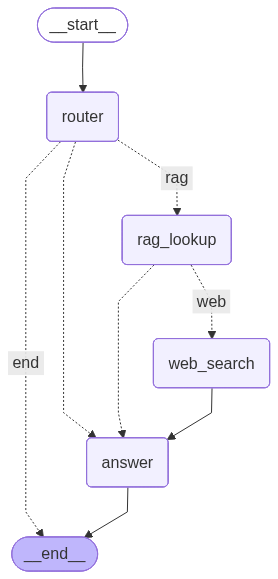

In [63]:
from IPython.display import Image, display

img = agent.get_graph(xray=True).draw_mermaid_png()
with open("agent.png", "wb") as f:
    f.write(img)


display(Image("agent.png"))